In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing Dataset

In [ ]:
df=pd.read_csv("bigdatamart_Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Checking Null values 

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [ ]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df["Outlet_Size"]=imp.fit_transform(df["Outlet_Size"].values.reshape(-1,1))

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
for i in df.dtypes.index:
  if df[i].dtypes=='object':
    print("\n")
    print(i,"\n")
    print(df[i].value_counts())



Item_Identifier 

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Item_Fat_Content 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Identifier 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OU

# Checking Correlation

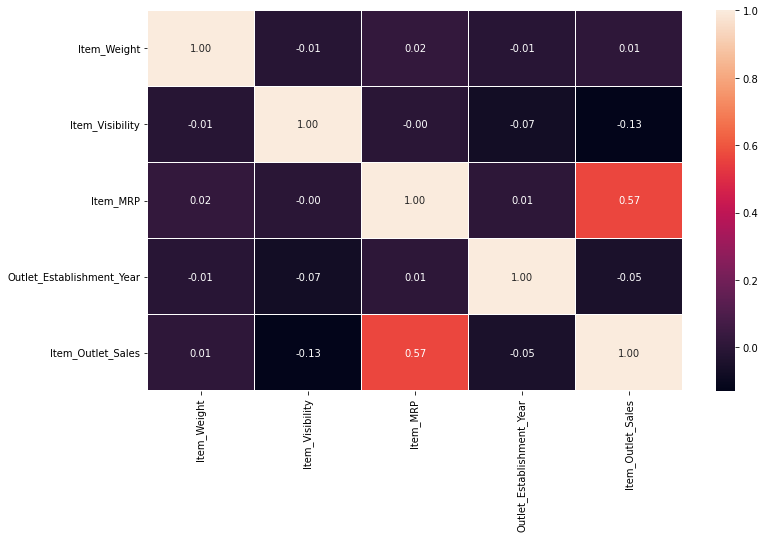

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="White",fmt=".2f")

- Item_Weight is 1 percent correlated with target column which is considered as a weak +ve bond.
- Item_Visibility is -13 percent correlated with target column which is considered as a strong -ve bond.
- Item_MRP is 57 percent correlated with target column which is considered as a good +ve bond.
- Outlet_Establishment_Year is -5 percent correlated with target column which is considered as a strong -ve bond.



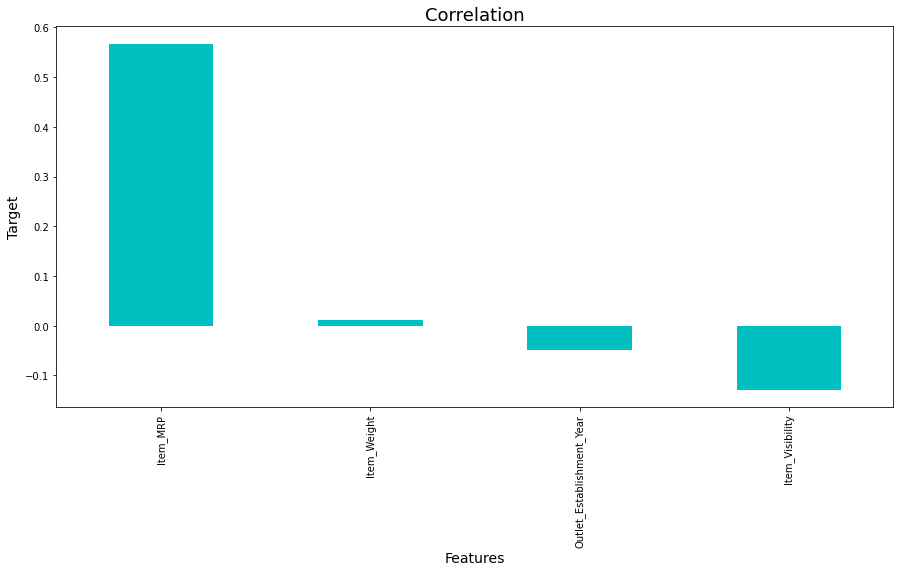

In [ ]:
plt.figure(figsize=(15,7))
df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- Max -ve correlation : Item_Visibility
- Min -ve correlation : Outlet_Establishment_Year

- Max +ve correlation : Item_MRP
- Min +ve correlation : Item_Weight

# Visualization

In [ ]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


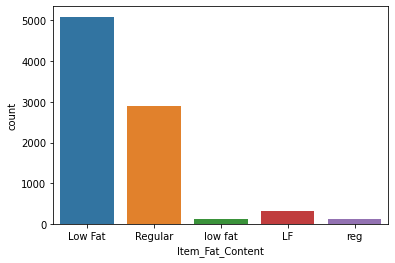

In [ ]:
sns.countplot(df["Item_Fat_Content"])
print(df['Item_Fat_Content'].value_counts())

Each item_Fat_Content quantity in product
- Low Fat    - 5089
- Regular    - 2889
- LF          - 316
- reg         - 117
- low fat     - 112

We can observe from above graph that 
- Low Fat, LF and low fat are the same.
- Regular and reg are same. 

Hence we rename miscoded string.

In [ ]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace(to_replace=['LF','low fat'])

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


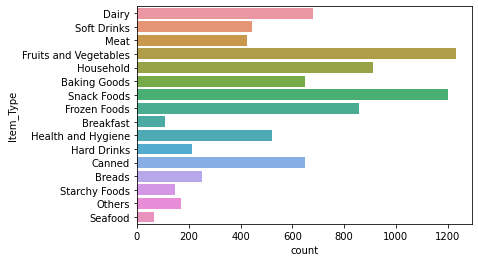

In [ ]:
sns.countplot(y=df["Item_Type"])
print(df['Item_Type'].value_counts())

Each item type and their quantity
- Fruits and Vegetables    - 1232
-Snack Foods              - 1200
-Household                 - 910
-Frozen Foods              - 856
-Dairy                     - 682
-Canned                    - 649
-Baking Goods              - 648
-Health and Hygiene        - 520
-Soft Drinks               - 445
-Meat                      - 425
-Breads                    - 251
-Hard Drinks               - 214
-Others                    - 169
-Starchy Foods             - 148
-Breakfast                 - 110
-Seafood                    - 64

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


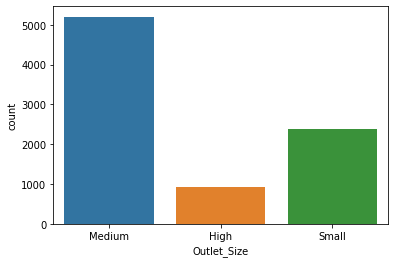

In [ ]:
sns.countplot(df["Outlet_Size"])
print(df['Outlet_Size'].value_counts())


Outlet_Size
- Medium    - 5203
-Small     - 2388
-High       - 932

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


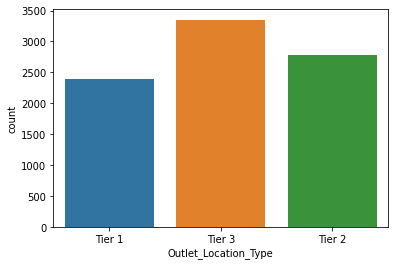

In [ ]:

sns.countplot(df["Outlet_Location_Type"])
print(df['Outlet_Location_Type'].value_counts())


Outlet_Location_Type and quantity
- Tier 3    - 3350
-Tier 2    - 2785
-Tier 1    - 2388

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


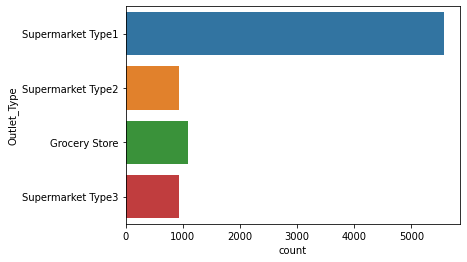

In [ ]:

sns.countplot(y=df["Outlet_Type"])
print(df['Outlet_Type'].value_counts())


Outlet_Type and their quantity
- Supermarket Type1    - 5577
-Grocery Store        - 1083
-Supermarket Type3     - 935
-Supermarket Type2     - 928

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


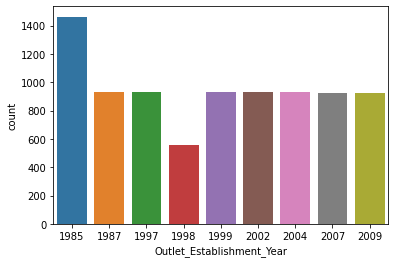

In [ ]:


sns.countplot(df["Outlet_Establishment_Year"])
print(df['Outlet_Establishment_Year'].value_counts())


Outlet_Establishment_Year and quantity of outlets
- 1985    - 1463
- 1987     - 932
- 1999     - 930
-1997     - 930
-2004     - 930
-2002     - 929
-2009     - 928
-2007     - 926
-1998     - 555

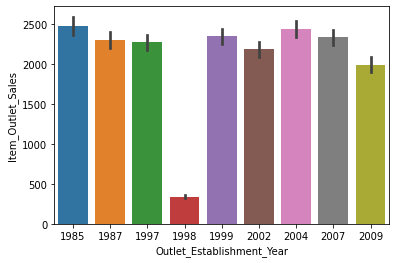

In [ ]:
sns.barplot(x=df["Outlet_Establishment_Year"],y=df["Item_Outlet_Sales"])

- 1998 had lowest sales
- 1985 had highest sales

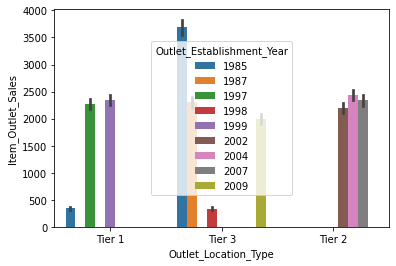

In [ ]:
sns.barplot(y=df["Item_Outlet_Sales"],x=df['Outlet_Location_Type'],hue=df["Outlet_Establishment_Year"])

Tier 1
- est. in 1999 had highest Sales among all Tier 1
- est. in 1985 had lowest Sales among all Tier 1

Tier 3
- est. in 1985 had highest Sales among all Tier 3
- est. in 1998 had lowest Sales among all Tier 3 

Tier 2
- est. in 2004 had highest Sales among all Tier 2 
- est. in 2002 had lowest Sales among all Tier 2 

Overall
- Tier 3 est. in 1985 had highest Sales among all the 3 Tier types
- Tier 1 est. in 1985 and Tier 3 est. in 1998 had lowest Sales among all among the 3 Tier types

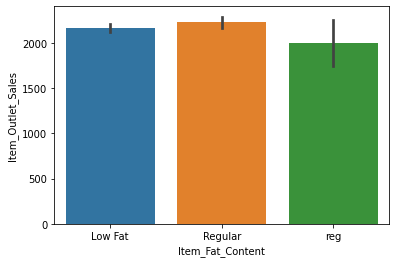

In [ ]:
sns.barplot(x=df["Item_Fat_Content"],y=df["Item_Outlet_Sales"])

- Product with Regular fat had highest sales
- Product with reg fat had lowest sales

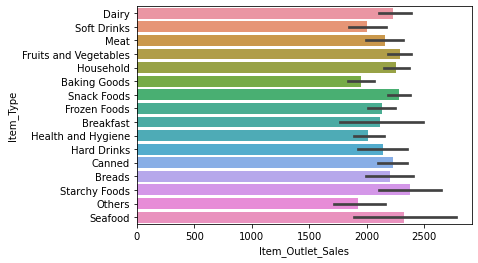

In [ ]:
sns.barplot(y=df["Item_Type"],x=df["Item_Outlet_Sales"])

- Starchy food had highest sales
- Baking Goods along with category 'others' had lowest sales

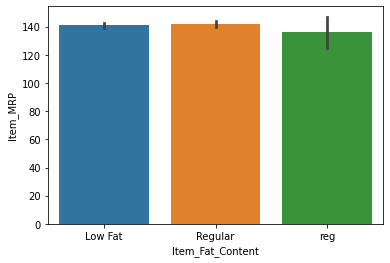

In [ ]:
sns.barplot(y=df["Item_MRP"],x=df['Item_Fat_Content'])

- Low Fat and Regular fat have

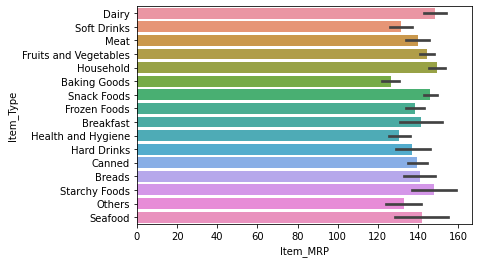

In [ ]:
sns.barplot(x=df["Item_MRP"],y=df['Item_Type'])

- Starchy foods and dairy items have highest mrp.
- Baking Goods have lowest mrp.

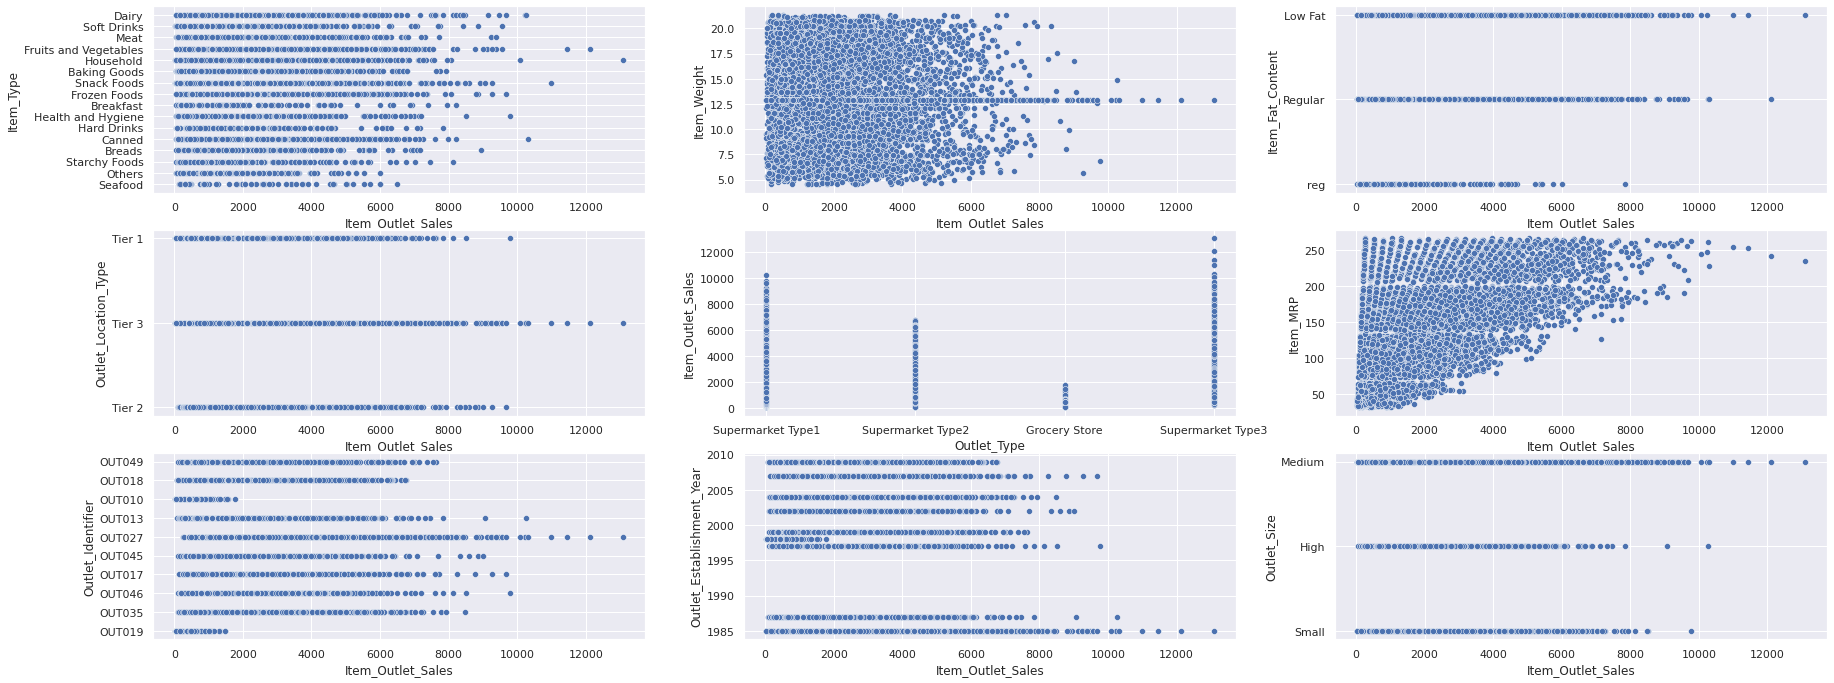

In [ ]:
import matplotlib.pyplot as plt

sns.set()
fig, axes = plt.subplots(3, 3,figsize=(30, 10))
plt.subplots_adjust(bottom=0.001)

sns.scatterplot(y="Item_Weight",x="Item_Outlet_Sales",data=df,ax=axes[0,1])
sns.scatterplot(y="Item_Fat_Content",x="Item_Outlet_Sales",data=df,ax=axes[0,2])



sns.scatterplot(y="Item_Type",x="Item_Outlet_Sales",data=df,ax=axes[0,0])
sns.scatterplot(y="Item_MRP",x="Item_Outlet_Sales",data=df,ax=axes[1,2])

sns.scatterplot(y="Outlet_Identifier",x="Item_Outlet_Sales",data=df,ax=axes[2,0])
sns.scatterplot(y="Outlet_Establishment_Year",x="Item_Outlet_Sales",data=df,ax=axes[2,1])
sns.scatterplot(y="Outlet_Size",x="Item_Outlet_Sales",data=df,ax=axes[2,2])




sns.scatterplot(y="Outlet_Location_Type",x="Item_Outlet_Sales",data=df,ax=axes[1,0])
sns.scatterplot(x="Outlet_Type",y="Item_Outlet_Sales",data=df,ax=axes[1,1])


- Item type has equally distributed item sales between 0 and 3000
- has equally distributed item sales between 
- Item fat content has equally distributed item sales between 0 and 2000
- Outlet location type has equally distributed item sales between 0 and 6000
- Outlet type has equally distributed item sales between 0 and 2000
- Outlet identifier has equally distributed item sales between 
- has equally distributed item sales between 
- has equally distributed item sales between 
- has equally distributed item sales between 

# Describing Data

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Item_Weight	
- mean -	12.857645	
-std -	4.226124
-min	- 4.555000
-max	- 21.350000

Item_Visibility	
- mean -	0.066132	
-std	- 0.051598	
-min	- 0.000000
-max - 0.328391

Item_MRP	
- mean -	140.992782	
-std	- 62.275067	
-min	- 31.290000
-max - 266.888400	

Outlet_Establishment_Year	
- mean -		1997.831867	
-std	- 8.371760
-min - 1985.000000
-max -	2009.000000	

Item_Outlet_Sales
- mean -	2181.288914
-std	- 1706.499616
-min - 33.290000
-max -	13086.964800


# Checking Outliers

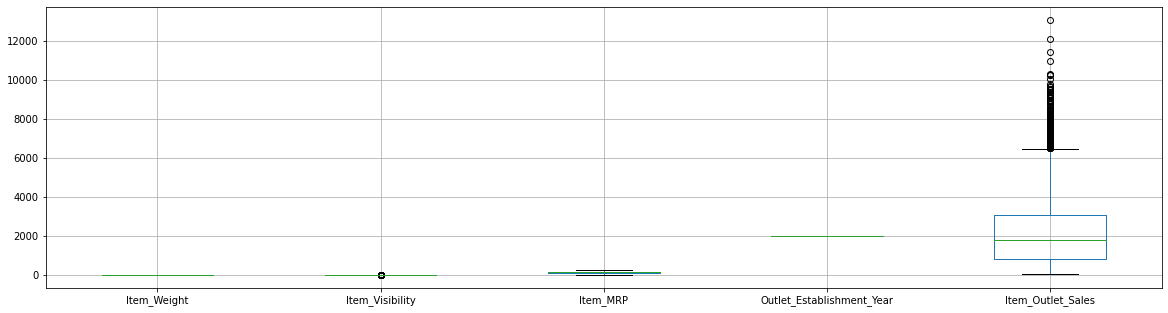

In [ ]:
import matplotlib.pyplot as plt
df.iloc[:,0:13].boxplot(figsize=(20,5))
plt.subplots_adjust(bottom=0.1)
plt.show()

In [ ]:
new_df_cap = df.copy()

In [ ]:
def remove_outliers(n):
    Q1 = np.percentile(df[n], 25, interpolation = 'midpoint')  
    Q3 = np.percentile(df[n], 75, interpolation = 'midpoint') 
    iqr = Q3 - Q1 
    percentile25 = df[n].quantile(0.25)
    percentile75 = df[n].quantile(0.75)
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df[df[n] > upper_limit]
    df[df[n] < lower_limit]
    
    new_df = df[df[n] < upper_limit]
    new_df.shape
    
    new_df_cap[n] = np.where(
    new_df_cap[n] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap[n] < lower_limit,
        lower_limit,
        new_df_cap[n] ) )
    
    sns.boxplot(new_df_cap[n])
    

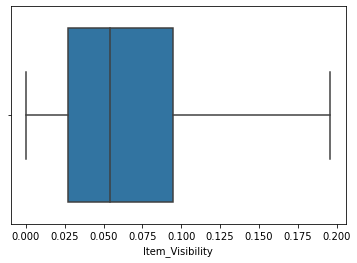

In [ ]:
remove_outliers("Item_Visibility")

# Separating feature and target data

In [ ]:
x=new_df_cap.drop(["Item_Outlet_Sales"],axis=1)
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [ ]:
y=new_df_cap["Item_Outlet_Sales"]
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Encoding Categorical Feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
list_encode = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type','Item_Identifier','Outlet_Identifier']
le = LabelEncoder()
for i in list_encode:
    x[i] = le.fit_transform(x[i])

In [ ]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1


# Detecting Skewness

In [ ]:
x.skew().sort_values()

Outlet_Establishment_Year   -0.396641
Outlet_Location_Type        -0.209093
Outlet_Size                 -0.087072
Outlet_Identifier           -0.059861
Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Type                    0.101655
Item_MRP                     0.127202
Item_Visibility              0.813980
Outlet_Type                  0.927438
Item_Fat_Content             0.994824
dtype: float64

Keeping +/-0.5 as range, the following have skewness
- Item Visibility
- Outlet Type
- Item_Fat_Content 

Only Item Visibility is non categorical

In [ ]:
from sklearn.preprocessing import power_transform

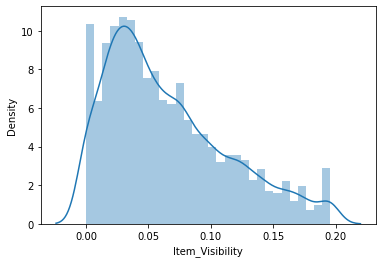

In [ ]:
sns.distplot(x["Item_Visibility"])

In [ ]:
new=power_transform(x['Item_Visibility'].values.reshape(-1,1))

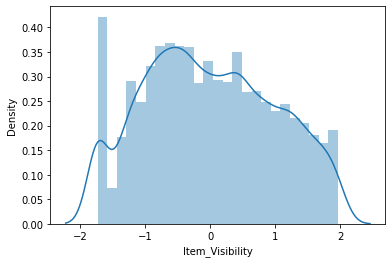

In [ ]:
x['Item_Visibility']=pd.DataFrame(new)
sns.distplot(x['Item_Visibility'])

In [ ]:
x['Item_Visibility'].skew()

0.12151452323873517

# Detecting Collinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(x)

,variables,VIF
0,Item_Identifier,4.066207
1,Item_Weight,10.291722
2,Item_Fat_Content,5.652623
3,Item_Visibility,1.031667
4,Item_Type,4.016922
5,Item_MRP,6.138584
6,Outlet_Identifier,15.480591
7,Outlet_Establishment_Year,59.963365
8,Outlet_Size,7.932745
9,Outlet_Location_Type,16.601376


VIF>5 in 
- Outlet_Establishment_Year 
- Outlet_Location_Type
- Outlet_Identifier
- Item_Weight
-Outlet_Type	

In [ ]:
X=x.drop(['Outlet_Establishment_Year','Item_Weight','Outlet_Identifier'],axis=1)
calc_vif(X)

,variables,VIF
0,Item_Identifier,3.583101
1,Item_Fat_Content,4.504892
2,Item_Visibility,1.029102
3,Item_Type,3.546661
4,Item_MRP,5.277968
5,Outlet_Size,5.025659
6,Outlet_Location_Type,4.544546
7,Outlet_Type,4.308812


# Traning Dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


mns=MinMaxScaler()
s=mns.fit_transform(X)
x=pd.DataFrame(data=s)
print(x)

             0     1         2         3         4    5    6         7
0     0.100128  0.25  0.158145  0.266667  0.927507  0.5  0.0  0.333333
1     0.005135  0.50  0.187314  0.933333  0.072068  0.5  1.0  0.666667
2     0.424904  0.25  0.164652  0.666667  0.468288  0.5  0.0  0.333333
3     0.719512  0.50  0.000000  0.400000  0.640093  0.5  1.0  0.000000
4     0.832478  0.25  0.000000  0.600000  0.095805  0.0  1.0  0.333333
...        ...   ...       ...       ...       ...  ...  ...       ...
8518  0.237484  0.25  0.471418  0.866667  0.777729  0.0  1.0  0.333333
8519  0.575738  0.50  0.405925  0.000000  0.326263  0.5  0.5  0.333333
8520  0.870988  0.25  0.319319  0.533333  0.228492  1.0  0.5  0.333333
8521  0.437099  0.50  0.871032  0.866667  0.304939  0.5  1.0  0.666667
8522  0.032092  0.25  0.391123  0.933333  0.187510  1.0  0.0  0.333333

[8523 rows x 8 columns]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lr=LinearRegression()

In [ ]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, training accuracy: {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, testing accuracy: {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, training accuracy: 0.5063059169765858
At random state 0, testing accuracy: 0.5104966585203816


At random state 1, training accuracy: 0.5070817792667995
At random state 1, testing accuracy: 0.5066987866368974


At random state 2, training accuracy: 0.5109950885112395
At random state 2, testing accuracy: 0.49187601817606386


At random state 3, training accuracy: 0.4979647095858528
At random state 3, testing accuracy: 0.5425869750026133


At random state 4, training accuracy: 0.5090842430835232
At random state 4, testing accuracy: 0.497914556349934


At random state 5, training accuracy: 0.5097042291358278
At random state 5, testing accuracy: 0.49680147914435757


At random state 6, training accuracy: 0.5070293367356242
At random state 6, testing accuracy: 0.506430403895627


At random state 7, training accuracy: 0.5111050570364883
At random state 7, testing accuracy: 0.4921622980648954


At random state 8, training accuracy: 0.5043375178035497
At random state 8, test

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_test))
print("Mean Sq. Error ",mean_squared_error(y_test,pred_test))
print("Root Mean Sq ",np.sqrt(mean_squared_error(y_test,pred_test)))

Mean Absolute Error  920.0314582999714
Mean Sq. Error  1500221.5162313948
Root Mean Sq  1224.83530167586


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=14)

In [ ]:
lr.fit(x_train,y_train) 
pred_train=lr.predict(x_train)

In [ ]:
print(r2_score(y_test,pred_test))

-0.48945170639029256


# Cross validation

In [ ]:
train_ac=r2_score(y_train,pred_train)
test_ac=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cv= {j} cv score is {cv_mean} and accuracy for training is {train_ac} and testing is {train_ac}")
    print("\n")

At cv= 2 cv score is 0.505482762422025 and accuracy for training is 0.5071421015729844 and testing is 0.5071421015729844


At cv= 3 cv score is 0.5056048180643457 and accuracy for training is 0.5071421015729844 and testing is 0.5071421015729844


At cv= 4 cv score is 0.5040776711509241 and accuracy for training is 0.5071421015729844 and testing is 0.5071421015729844


At cv= 5 cv score is 0.5049929065791503 and accuracy for training is 0.5071421015729844 and testing is 0.5071421015729844


At cv= 6 cv score is 0.5050038374779202 and accuracy for training is 0.5071421015729844 and testing is 0.5071421015729844


At cv= 7 cv score is 0.5055244230984498 and accuracy for training is 0.5071421015729844 and testing is 0.5071421015729844


At cv= 8 cv score is 0.5049490313627889 and accuracy for training is 0.5071421015729844 and testing is 0.5071421015729844


At cv= 9 cv score is 0.5051847280832388 and accuracy for training is 0.5071421015729844 and testing is 0.5071421015729844


At cv= 10

# Regularization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

parameters={'alpha':[0.00001,.0001,.001,.01,.1,1,10],
            'random_state': list(range(0,10)),
            'selection':['cyclic', 'random'],
            'fit_intercept': ['True','False']}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'fit_intercept': 'True', 'random_state': 8, 'selection': 'random'}


In [ ]:
ls=Lasso(alpha=0.01,random_state=4,fit_intercept=True,selection='random')
ls.fit(x_train,y_train)
ls_score_train=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
print("Training:",ls_score_train*100)

Training: 50.29641234997078


In [ ]:
lss=r2_score(y_test,pred_ls)
print("Testing:",lss*100)

Testing: 52.38585923602206


In [ ]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
print("Cross Validation :",cv_mean*100)

Cross Validation : 50.499446021101335


# Ensemble Methods

# RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameter={'criterion':['mse','mae'],
          'max_features' : ["auto","sqrt","log2"],
           'n_estimators':range(0,100,10)}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt', 'n_estimators': 40}


In [ ]:
rf=RandomForestRegressor(criterion='mae',max_features="sqrt", n_estimators=40)
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print('Training r2',train_r2*100)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

from sklearn.metrics import mean_absolute_error,mean_squared_error
print("\nMean Absolute Error ",mean_absolute_error(y_test,pred_decision))
print("Mean Sq. Error ",mean_squared_error(y_test,pred_decision))
print("Root Mean Sq ",np.sqrt(mean_squared_error(y_test,pred_decision)))

Training r2 91.9485813247911
R2 Score: 56.285949263853354
Cross Val Score: 56.612713293124784

Mean Absolute Error  787.8406469956012
Mean Sq. Error  1277919.6737763125
Root Mean Sq  1130.4510930492802


# AdaBoostRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

parameter={'loss':['linear', 'square', 'exponential'],
          'random_state' : range(0,100,10),
           'learning_rate':[0,1.0,2.0],
           'n_estimators':range(0,100,10)}

rf2=AdaBoostRegressor()
clf=GridSearchCV(rf2,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 10, 'random_state': 40}


In [ ]:
rf2=AdaBoostRegressor(learning_rate= 1.0, loss= 'exponential', n_estimators= 10, random_state= 40)
rf2.fit(x_train,y_train)
train_r2=rf2.score(x_train,y_train)
pred_decision=rf2.predict(x_test)
print('Training r2',train_r2*100)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:', rfs*100)

rfscore=cross_val_score(rf2,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

from sklearn.metrics import mean_absolute_error,mean_squared_error
print("\nMean Absolute Error ",mean_absolute_error(y_test,pred_decision))
print("Mean Sq. Error ",mean_squared_error(y_test,pred_decision))
print("Root Mean Sq ",np.sqrt(mean_squared_error(y_test,pred_decision)))

Training r2 54.718295241364466
R2 Score: 54.49586719958952
Cross Val Score: 55.582915032711355

Mean Absolute Error  855.3862933881483
Mean Sq. Error  1330250.2413872725
Root Mean Sq  1153.3647477651086


# GradientBoostingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

parameter={'loss':['squared_error', 'absolute_error', 'huber','quantile'],
          'criterion':['friedman_mse', 'squared_error', 'mse'],
           'learning_rate':[0,1.0,2.0],
           'n_estimators':range(0,100,10)}

rf3=GradientBoostingRegressor()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'huber', 'n_estimators': 10}


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
rf3=GradientBoostingRegressor(learning_rate= 1.0, loss= 'huber', n_estimators= 10, criterion= 'friedman_mse')
rf3.fit(x_train,y_train)
train_r2=rf3.score(x_train,y_train)
pred_decision=rf3.predict(x_test)
print('Training r2',train_r2*100)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:', rfs*100)

rfscore=cross_val_score(rf3,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

from sklearn.metrics import mean_absolute_error,mean_squared_error
print("\nMean Absolute Error ",mean_absolute_error(y_test,pred_decision))
print("Mean Sq. Error ",mean_squared_error(y_test,pred_decision))
print("Root Mean Sq ",np.sqrt(mean_squared_error(y_test,pred_decision)))

Training r2 61.396822803745586
R2 Score: 58.405233923636835
Cross Val Score: 57.745069702271756

Mean Absolute Error  767.8663010180917
Mean Sq. Error  1215965.3246491514
Root Mean Sq  1102.7081774654396


# BaggingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

parameter={'oob_score':['True','False'],
          'n_jobs':range(0,10),
           'random_state':range(0,100,10),
           }

rf4=BaggingRegressor()
clf=GridSearchCV(rf4,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_jobs': 1, 'oob_score': 'True', 'random_state': 80}


In [ ]:
rf4=BaggingRegressor(oob_score= True, n_jobs= 1,random_state= 80)
rf4.fit(x_train,y_train)
train_r2=rf4.score(x_train,y_train)
pred_decision=rf4.predict(x_test)
print('Training r2',train_r2*100)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:', rfs*100)

rfscore=cross_val_score(rf4,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

from sklearn.metrics import mean_absolute_error,mean_squared_error
print("\nMean Absolute Error ",mean_absolute_error(y_test,pred_decision))
print("Mean Sq. Error ",mean_squared_error(y_test,pred_decision))
print("Root Mean Sq ",np.sqrt(mean_squared_error(y_test,pred_decision)))

Training r2 90.97208822979346
R2 Score: 50.55541405165407
Cross Val Score: 50.989774372075026

Mean Absolute Error  828.1210247038124
Mean Sq. Error  1445443.9266335738
Root Mean Sq  1202.266162974561


# VotingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

estimators = [ ('knc', KNeighborsRegressor()), ('svr',SVR()) ]
parameter={
          'n_jobs':range(0,10),
           'verbose':[True,False]}

rf5=VotingRegressor(estimators)
clf=GridSearchCV(rf5,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   2.0s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   1.9s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   1.9s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   1.9s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   1.9s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   3.2s
{'n_jobs': 1, 'verbose': True}


In [ ]:
rf5=VotingRegressor(estimators,verbose= True, n_jobs= 1)
rf5.fit(x_train,y_train)
train_r2=rf5.score(x_train,y_train)
pred_decision=rf5.predict(x_test)
print('Training r2',train_r2*100)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:', rfs*100)

rfscore=cross_val_score(rf5,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

from sklearn.metrics import mean_absolute_error,mean_squared_error
print("\nMean Absolute Error ",mean_absolute_error(y_test,pred_decision))
print("Mean Sq. Error ",mean_squared_error(y_test,pred_decision))
print("Root Mean Sq ",np.sqrt(mean_squared_error(y_test,pred_decision)))

[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   4.3s
Training r2 51.126156742945284
R2 Score: 42.2632868892601
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   3.0s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   3.0s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   3.1s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   3.1s
[Voting] ...................... (1 of 2) Processing knc, total=   0.0s
[Voting] ...................... (2 of 2) Processing svr, total=   3.1s
Cross Val Score: 42.56543061841022

Mean Absolute Error  928.3582454355161
Mean Sq. Error 

# Model Saving

In [ ]:
import pickle
filename='rf.pk1'
pickle.dump(rf3,open(filename,'wb'))

# Loading Model

In [ ]:
loaded_model=pickle.load(open('rf.pk1','rb'))
result=loaded_model.score(x,y)
print("Training Accuracy:",result*100)

Training Accuracy: 60.79599335473249


# Importing Testing Dataset

In [ ]:
df_test=pd.read_csv("bigdatamart_Test.csv")

# Checking Null Values for Testing Dataset

In [ ]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df_test["Item_Weight"]=imp.fit_transform(df_test["Item_Weight"].values.reshape(-1,1))


In [ ]:

imp2=SimpleImputer(strategy='most_frequent')
df_test["Outlet_Size"]=imp2.fit_transform(df_test["Outlet_Size"].values.reshape(-1,1))

In [ ]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Checking Outliers of Testing Datset

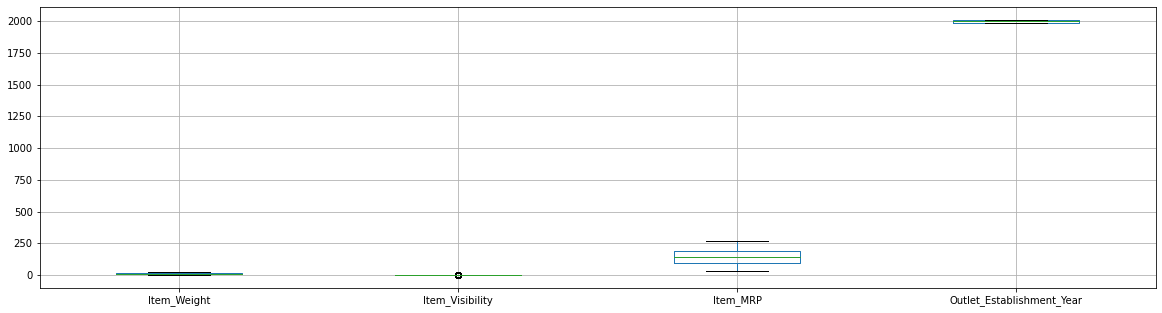

In [ ]:
import matplotlib.pyplot as plt
df_test.iloc[:,0:13].boxplot(figsize=(20,5))
plt.subplots_adjust(bottom=0.1)
plt.show()

Only Item Visibility has outliers

In [ ]:
new_df_cap_test = df_test.copy()

In [ ]:
def remove_outliers(n):
    Q1 = np.percentile(df_test[n], 25, interpolation = 'midpoint')  
    Q3 = np.percentile(df_test[n], 75, interpolation = 'midpoint') 
    iqr = Q3 - Q1 
    percentile25 = df_test[n].quantile(0.25)
    percentile75 = df_test[n].quantile(0.75)
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df_test[df_test[n] > upper_limit]
    df_test[df_test[n] < lower_limit]
    
    new_df_test = df_test[df_test[n] < upper_limit]
    new_df_test.shape
    
    new_df_cap_test[n] = np.where(
    new_df_cap_test[n] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap_test[n] < lower_limit,
        lower_limit,
        new_df_cap_test[n] ) )
    
    sns.boxplot(new_df_cap[n])
    

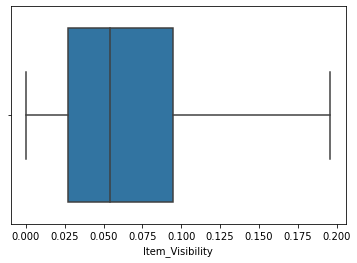

In [ ]:
remove_outliers("Item_Visibility")

# Encoding Categorical Feature Testing Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
list_encode = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type','Item_Identifier','Outlet_Identifier']
le = LabelEncoder()
for i in list_encode:
    new_df_cap_test[i] = le.fit_transform(new_df_cap_test[i])

In [ ]:
new_df_cap_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


# Detecting Skewness of Test data

In [ ]:
new_df_cap_test.skew().sort_values()

Outlet_Establishment_Year   -0.396306
Outlet_Location_Type        -0.209049
Outlet_Size                 -0.087108
Outlet_Identifier           -0.060209
Item_Identifier             -0.000020
Item_Type                    0.096486
Item_MRP                     0.136182
Item_Weight                  0.142813
Item_Visibility              0.818631
Outlet_Type                  0.927446
Item_Fat_Content             0.999629
dtype: float64

Keeping +/-0.5 as range, the following have skewness
- Item Visibility
- Outlet Type
- Item_Fat_Content 

Only Item Visibility is non categorical

In [ ]:
from sklearn.preprocessing import power_transform

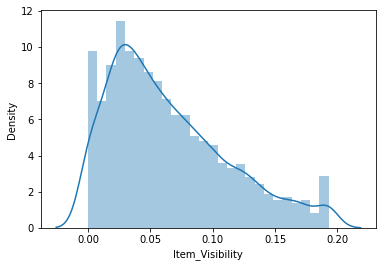

In [ ]:
sns.distplot(new_df_cap_test["Item_Visibility"])

In [ ]:
new=power_transform(new_df_cap_test['Item_Visibility'].values.reshape(-1,1))

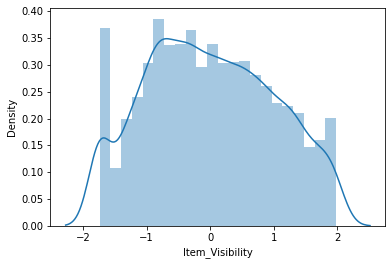

In [ ]:
new_df_cap_test['Item_Visibility']=pd.DataFrame(new)
sns.distplot(new_df_cap_test['Item_Visibility'])

In [ ]:
new_df_cap_test['Item_Visibility'].skew()

0.11376514747032855

# Detecting Collinearity for Test data

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(new_df_cap_test)

,variables,VIF
0,Item_Identifier,4.078862
1,Item_Weight,10.017877
2,Item_Fat_Content,5.711516
3,Item_Visibility,1.032629
4,Item_Type,4.030422
5,Item_MRP,6.243368
6,Outlet_Identifier,15.489963
7,Outlet_Establishment_Year,59.467390
8,Outlet_Size,7.936932
9,Outlet_Location_Type,16.604874


VIF>5 in 
- Outlet_Establishment_Year 
- Outlet_Location_Type
- Outlet_Identifier
- Item_Weight
-Outlet_Type	

In [ ]:
X_test=new_df_cap_test.drop(['Outlet_Establishment_Year','Item_Weight','Outlet_Identifier'],axis=1)
calc_vif(X)

,variables,VIF
0,Item_Identifier,3.583101
1,Item_Fat_Content,4.504892
2,Item_Visibility,1.029102
3,Item_Type,3.546661
4,Item_MRP,5.277968
5,Outlet_Size,5.025659
6,Outlet_Location_Type,4.544546
7,Outlet_Type,4.308812


# Prediction for Testing Dataset using loaded model

In [ ]:
from sklearn.preprocessing import MinMaxScaler


mns=MinMaxScaler()
s=mns.fit_transform(X_test)
x_t=pd.DataFrame(data=s)
print(x_t)

             0     1         2         3         4    5    6         7
0     0.715305  0.25  0.077603  0.866667  0.323413  0.5  0.0  0.333333
1     0.691958  1.00  0.345146  0.266667  0.235849  0.5  0.5  0.333333
2     0.911803  0.25  0.704321  0.733333  0.894140  0.5  1.0  0.000000
3     0.524643  0.25  0.152502  0.866667  0.524488  0.5  0.5  0.333333
4     0.767834  0.50  0.783506  0.266667  0.862069  0.5  1.0  1.000000
...        ...   ...       ...       ...       ...  ...  ...       ...
5676  0.149805  0.50  0.134867  0.866667  0.466011  1.0  0.0  0.333333
5677  0.198444  0.50  0.868749  1.000000  0.584637  0.5  1.0  0.666667
5678  0.915694  0.25  0.573635  0.533333  0.369798  0.5  0.5  0.333333
5679  0.335279  0.50  0.000000  0.200000  0.778487  0.5  0.5  0.333333
5680  0.640078  0.50  0.726966  0.200000  0.203778  0.5  0.5  0.333333

[5681 rows x 8 columns]


In [ ]:
testing_result=loaded_model.predict(x_t)

x_t is testing dataset

In [ ]:
testing_result

array([1580.02313288, 1410.02407587,  487.49613204, ..., 1883.09665444,
       3382.56094286, 1425.19585563])

In [ ]:
test2=pd.DataFrame(loaded_model.predict(x_t),columns=["Item_Outlet_Sales"])
test2.head()

,Item_Outlet_Sales
0,1580.023133
1,1410.024076
2,487.496132
3,2536.859972
4,6016.352424


Our y_test is test2 dataframe

In [ ]:
a=pd.concat([df_test,test2],axis=1)
a.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1580.023133
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,1410.024076
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,487.496132
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,2536.859972
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,6016.352424


Combining predicted output dataframe with testing dataset

# Visualization

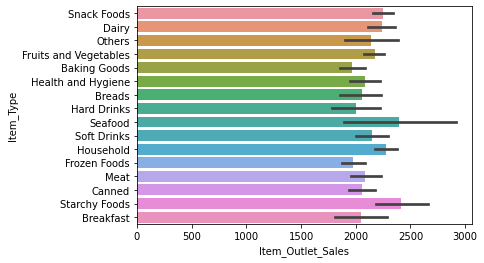

In [ ]:
sns.barplot(y=a["Item_Type"],x=a["Item_Outlet_Sales"])

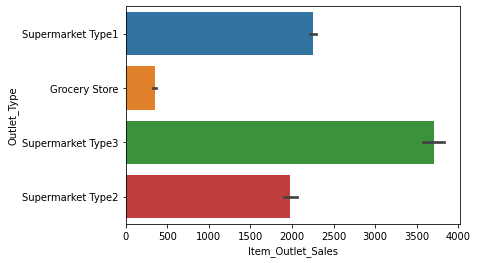

In [ ]:
sns.barplot(x=a["Item_Outlet_Sales"],y=a["Outlet_Type"])

# Sales at each store

In [ ]:
a["Item_Type"].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [ ]:
Items=[]
for i in a["Item_Type"].unique():
  Items.append(i)

In [ ]:
z=[]
for j in Items:
  for i in range(len(a)):
    if a.iloc[i,4]==j:
      z.append(a.iloc[i,4:])


In [ ]:
shops=pd.DataFrame(z)
shops.shape

(5681, 8)

In [ ]:
shops=shops.drop(["Outlet_Identifier","Outlet_Establishment_Year",	"Outlet_Size"],axis=1)
shops.head()


,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Snack Foods,107.8622,Tier 1,Supermarket Type1,1580.023133
3,Snack Foods,155.0340,Tier 2,Supermarket Type1,2536.859972
8,Snack Foods,95.7436,Tier 2,Supermarket Type1,1595.194913
19,Snack Foods,193.7136,Tier 3,Grocery Store,722.666839
24,Snack Foods,180.7318,Tier 2,Supermarket Type1,2876.038361


In [ ]:
import sqlite3
dbcon=sqlite3.connect('Sales.db')
cur=dbcon.cursor()
cur.execute('Create table detail(Item_Type text,	Item_MRP float,	Outlet_Location_Type text,	Outlet_Type	text, Item_Outlet_Sales float)')
dbcon.commit()

In [ ]:
shops.to_sql('detail',dbcon,if_exists='replace', index = False)

# Sales of each product

In [ ]:
for x in Items:
  n=cur.execute(f'select distinct(Item_Type),count(Item_Type),sum(Item_Outlet_Sales) from detail where Item_Type="{x}"'.format(x))
  for row in n:
    print ("Item:",row[0],"\nTotal Count:",row[1],"\nTotal Sales:",row[2],"\n")

Item: Snack Foods 
Total Count: 789 
Total Sales: 1777208.6739216277 

Item: Dairy 
Total Count: 454 
Total Sales: 1015984.2536096526 

Item: Others 
Total Count: 111 
Total Sales: 237384.23292942366 

Item: Fruits and Vegetables 
Total Count: 781 
Total Sales: 1696736.1160036463 

Item: Baking Goods 
Total Count: 438 
Total Sales: 862670.9718012363 

Item: Health and Hygiene 
Total Count: 338 
Total Sales: 703996.1027367272 

Item: Breads 
Total Count: 165 
Total Sales: 339327.0184841718 

Item: Hard Drinks 
Total Count: 148 
Total Sales: 296423.80550184264 

Item: Seafood 
Total Count: 25 
Total Sales: 59857.17706719733 

Item: Soft Drinks 
Total Count: 281 
Total Sales: 604801.2333846447 

Item: Household 
Total Count: 638 
Total Sales: 1454452.435705441 

Item: Frozen Foods 
Total Count: 570 
Total Sales: 1128395.3141092788 

Item: Meat 
Total Count: 311 
Total Sales: 648700.5789675597 

Item: Canned 
Total Count: 435 
Total Sales: 894560.1850540147 

Item: Starchy Foods 
Total Cou

# Sales of all product at each store

In [ ]:
Outlet=[]

for i in Items:
    for j in shops["Outlet_Type"].unique():
      cur.execute(f'select distinct(Item_Type),count(Item_Type),sum(Item_Outlet_Sales), Outlet_Type,Outlet_Location_Type from detail where Item_Type="{i}" and Outlet_Type="{j}"	')
      for row in cur.fetchall():
        print("Outlet Type:",row[3],"\nOutlet_Location_Type:",row[4],"\nItem:",row[0],"\nTotal Count:",row[1],"\nTotal Sales:",row[2],"\n")

Outlet Type: Supermarket Type1 
Outlet_Location_Type: Tier 1 
Item: Snack Foods 
Total Count: 526 
Total Sales: 1245629.6564361462 

Outlet Type: Grocery Store 
Outlet_Location_Type: Tier 3 
Item: Snack Foods 
Total Count: 93 
Total Sales: 37477.13841857789 

Outlet Type: Supermarket Type2 
Outlet_Location_Type: Tier 3 
Item: Snack Foods 
Total Count: 87 
Total Sales: 173300.1639472731 

Outlet Type: Supermarket Type3 
Outlet_Location_Type: Tier 3 
Item: Snack Foods 
Total Count: 83 
Total Sales: 320801.7151196328 

Outlet Type: Supermarket Type1 
Outlet_Location_Type: Tier 2 
Item: Dairy 
Total Count: 296 
Total Sales: 668029.3498677885 

Outlet Type: Grocery Store 
Outlet_Location_Type: Tier 1 
Item: Dairy 
Total Count: 49 
Total Sales: 18650.586534797985 

Outlet Type: Supermarket Type2 
Outlet_Location_Type: Tier 3 
Item: Dairy 
Total Count: 51 
Total Sales: 110106.89630860795 

Outlet Type: Supermarket Type3 
Outlet_Location_Type: Tier 3 
Item: Dairy 
Total Count: 58 
Total Sales: